In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

# Credit data

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

In [5]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
data.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


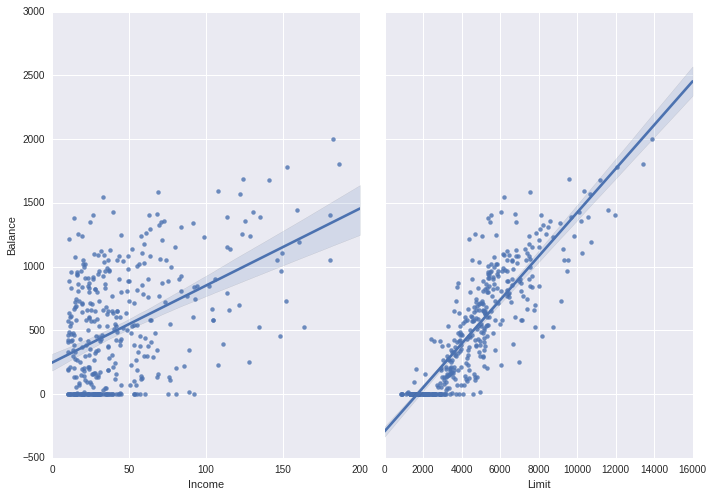

In [7]:
sns.pairplot(data, x_vars=['Income', 'Limit'], y_vars='Balance', size=7, aspect=0.7, kind='reg')

In [30]:
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# Lasso

In [10]:
clf = linear_model.Lasso(alpha=20)

In [11]:
clf.fit(X_train, Y_train)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
clf.coef_

array([-7.15253339,  0.05964496,  2.98617329,  0.        , -0.7694637 ,
        0.42999251])

In [13]:
clf.intercept_

-465.03609128782171

# scores

In [14]:
clf.score(X_test, Y_test)

0.86961251100594639

# cross validation

In [15]:
cross_val_score(clf, X, Y, cv=5)

array([ 0.8600418 ,  0.85456087,  0.88492109,  0.87161247,  0.88764481])

# rescaling 

In [16]:
scaler = preprocessing.StandardScaler().fit(X_test)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
print(scaler.mean_)
print(scaler.scale_)

[  5.02095500e+01   5.04940000e+03   3.75630000e+02   2.77000000e+00
   5.64300000e+01   1.32500000e+01]
[  3.87158186e+01   2.48453851e+03   1.63337176e+02   1.24783813e+00
   1.60619146e+01   3.15079355e+00]


In [18]:
print(np.mean(scaler.transform(X_test), axis=0))
print(np.std(scaler.transform(X_test), axis=0))

[  2.00950367e-16   1.46965773e-16   3.05311332e-17   1.94289029e-18
   1.47104551e-17   8.88178420e-18]
[ 1.  1.  1.  1.  1.  1.]


# MiCodigo

In [33]:
# Antes de correrlo en mi computador, debería instalar jupyter (notebook) y todas las cosas importadas.

def lasso(X, Y, lamb):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
    clf = linear_model.Lasso(alpha=lamb)
    clf.fit(X_train, Y_train)
    coefs = np.append(clf.intercept_, clf.coef_)
    scaler =preprocessing.StandardScaler().fit(X_test)
    X_test = scaler.transform(X_test)
    return coefs, clf.score(X_train, Y_train), clf.score(X_test, Y_test)


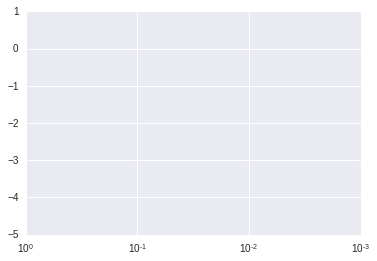

In [35]:
# Arreglar esto
lamb = np.logspace(0, 0.001, 1000)
coefs = np.array([])
train_score = np.array([])
test_score = np.array([])
for i in range(np.size(lamb)):
    temp_coefs, temp_train_score, temp_test_score = lasso(X, Y, lamb[i])
    coefs = np.append(coefs, temp_coefs)
    train_score = np.append(train_score, temp_train_score)
    test_score = np.append(test_score, temp_test_score)
plt.semilogx(lamb, train_score)
plt.semilogx(lamb, test_score)
plt.xlim((0, 0.001))
plt.savefig('prueba.pdf')

# Ejercicio Bono

In [ ]:
X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender']]
Y=data['Balance']

In [28]:
XX = X.replace([' Male', 'Female'], [0, 1])
XX

,Income,Limit,Rating,Cards,Age,Education,Gender
1,14.891,3606,283,2,34,11,0
2,106.025,6645,483,3,82,15,1
3,104.593,7075,514,4,71,11,0
4,148.924,9504,681,3,36,11,1
5,55.882,4897,357,2,68,16,0
6,80.180,8047,569,4,77,10,0
7,20.996,3388,259,2,37,12,1
8,71.408,7114,512,2,87,9,0
9,15.125,3300,266,5,66,13,1
10,71.061,6819,491,3,41,19,1


$Nada \ sirve! \ :($